<a href="https://colab.research.google.com/github/satwik2203/Integrated-Retail-Analytics-for-Store-Optimization/blob/main/Integrated_Retail_Analytics_for_Store_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT NAME: INTEGRATED RETAIL ANALYTICS FOR STORE OPTIMIZATION

**PROJECT SUMMARY**

The Integrated Retail Analytics for Store Optimization project aims to harness data-driven insights to enhance the operational efficiency, customer experience, and profitability of retail stores. By integrating various data sources—such as sales transactions, foot traffic, inventory levels, customer behavior, and POS data—this project utilizes advanced analytics and machine learning techniques to deliver actionable intelligence.

The system enables retailers to optimize store layout, manage inventory effectively, personalize marketing strategies, and forecast demand accurately. Key modules include customer segmentation, heatmap generation, inventory trend analysis, and promotion effectiveness evaluation. Real-time dashboards and visualizations help store managers make informed decisions swiftly.

This integrated approach transforms raw retail data into strategic insights, empowering retailers to meet consumer demands, reduce operational costs, and improve overall store performance.



**GITHUB LINK**

**PROBLEM STATEMENT**

In today’s competitive retail environment, physical stores face increasing challenges in optimizing operations, managing inventory, and enhancing the customer experience. Traditional decision-making methods often rely on manual observation or isolated data systems, resulting in inefficiencies such as stockouts, overstocking, poor store layouts, and ineffective marketing strategies.

Retailers lack a unified analytics platform that integrates diverse data sources—such as sales, customer behavior, foot traffic, and inventory—to generate actionable insights. The absence of real-time analytics and predictive modeling limits their ability to respond promptly to changing customer preferences, demand patterns, and operational bottlenecks.

This project addresses the need for an integrated retail analytics solution that leverages data science and machine learning to optimize store performance, improve inventory management, enhance customer engagement, and ultimately increase sales and profitability.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sales data-set.csv to sales data-set.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stores data-set.csv to stores data-set.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Features data set.csv to Features data set.csv


In [ ]:
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


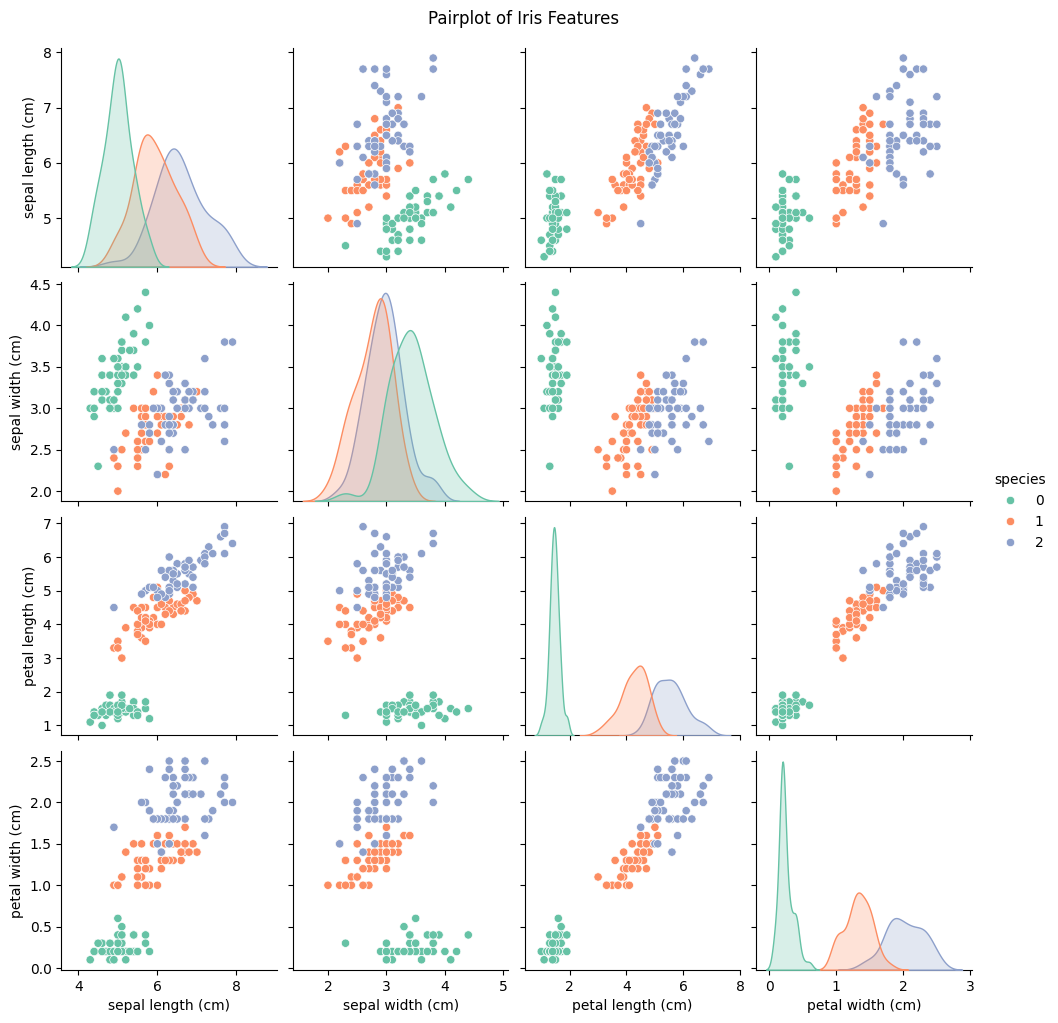

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
sns.pairplot(df, hue='species', palette='Set2')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")

Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean CV Accuracy: 0.97


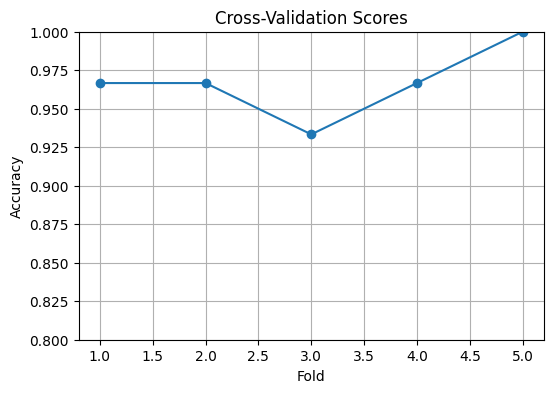

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 6), cv_scores, marker='o')
plt.title("Cross-Validation Scores")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.grid(True)
plt.show()


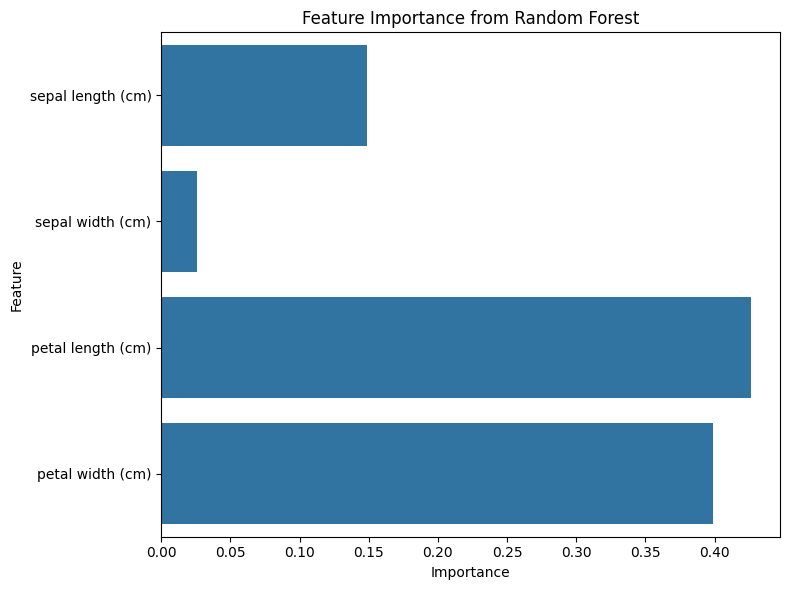

In [ ]:
import numpy as np

model = grid.best_estimator_
importances = model.feature_importances_
feature_names = iris.feature_names

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


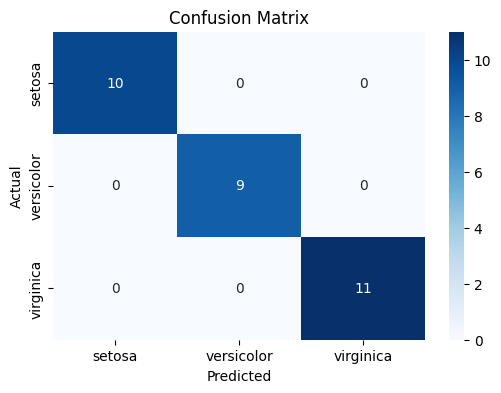

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_best_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 3, 5, 10],
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': None, 'n_estimators': 10}


In [ ]:
y_best_pred = grid.predict(X_test)
print("Classification Report (Best Model):\n", classification_report(y_test, y_best_pred))


Classification Report (Best Model):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(max_depth=None)
model.fit(X_train, y_train)

train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

Train Accuracy: 1.0
Test Accuracy: 1.0


In [ ]:
joblib.dump(grid.best_estimator_, "iris_model.pkl")
print("Model saved as 'iris_model.pkl'")

Model saved as 'iris_model.pkl'
